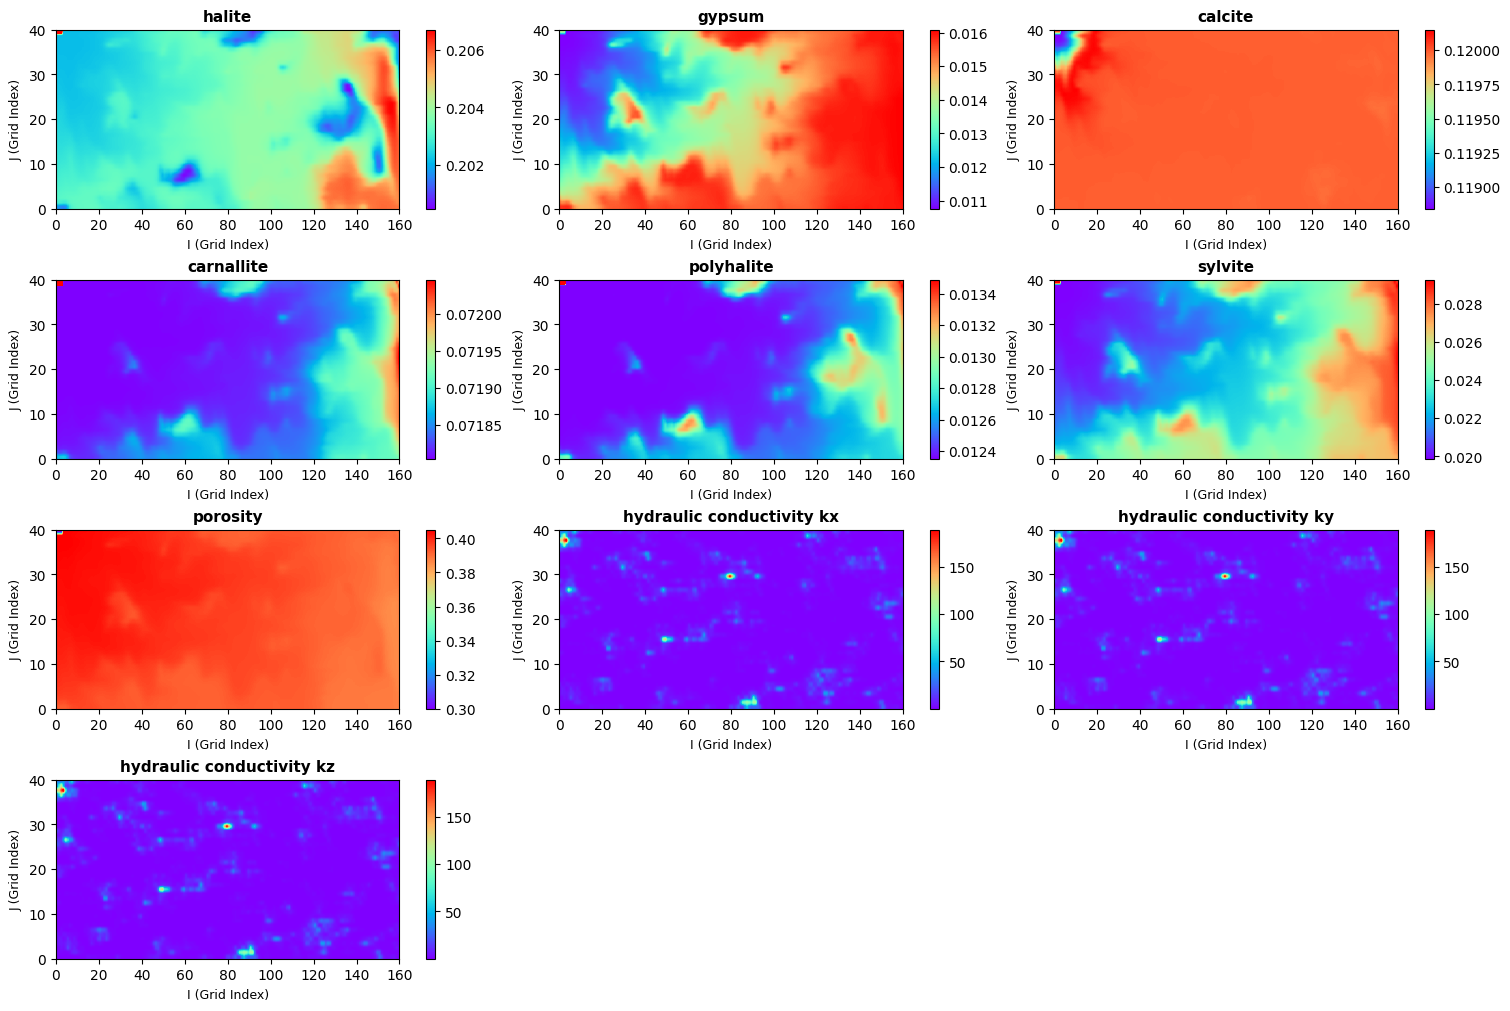

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

filename = 'run_1.gsv'
I = 160  
J = 40   

variables_map = {
    "halite": 3,
    "gypsum": 4,
    "calcite": 5,
    "carnallite": 6,
    "polyhalite": 7,
    "sylvite": 8,
    "porosity": 9,
    "hydraulic conductivity kx": 10,
    "hydraulic conductivity ky": 11,
    "hydraulic conductivity kz": 12
}

df = pd.read_csv(filename, skiprows=3, header=None, sep='\s+', engine='python')
data = df.values

plot_vars = list(variables_map.keys())
num_plots = len(plot_vars)
cols = 3
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 2.5 * rows), constrained_layout=True)
axes = axes.flatten()

for idx, var_name in enumerate(plot_vars):
    ax = axes[idx]
    col_idx = variables_map[var_name]
        
    col_data = data[:, col_idx]
    
    grid_data = col_data.reshape(J, I)

    unique_vals = np.unique(grid_data)
    if len(unique_vals) >= 2:
        vmax_val = unique_vals[-2]
    else:
        vmax_val = unique_vals[0]
    
    im = ax.imshow(
        grid_data,
        origin='lower',
        cmap='rainbow',
        aspect='auto',
        vmin=grid_data.min(),
        vmax=vmax_val,
        extent=[0, I, 0, J]
    )
    
    ax.set_title(var_name, fontsize=11, fontweight='bold')
    ax.set_xlabel('I (Grid Index)', fontsize=9)
    ax.set_ylabel('J (Grid Index)', fontsize=9)
    
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.show()

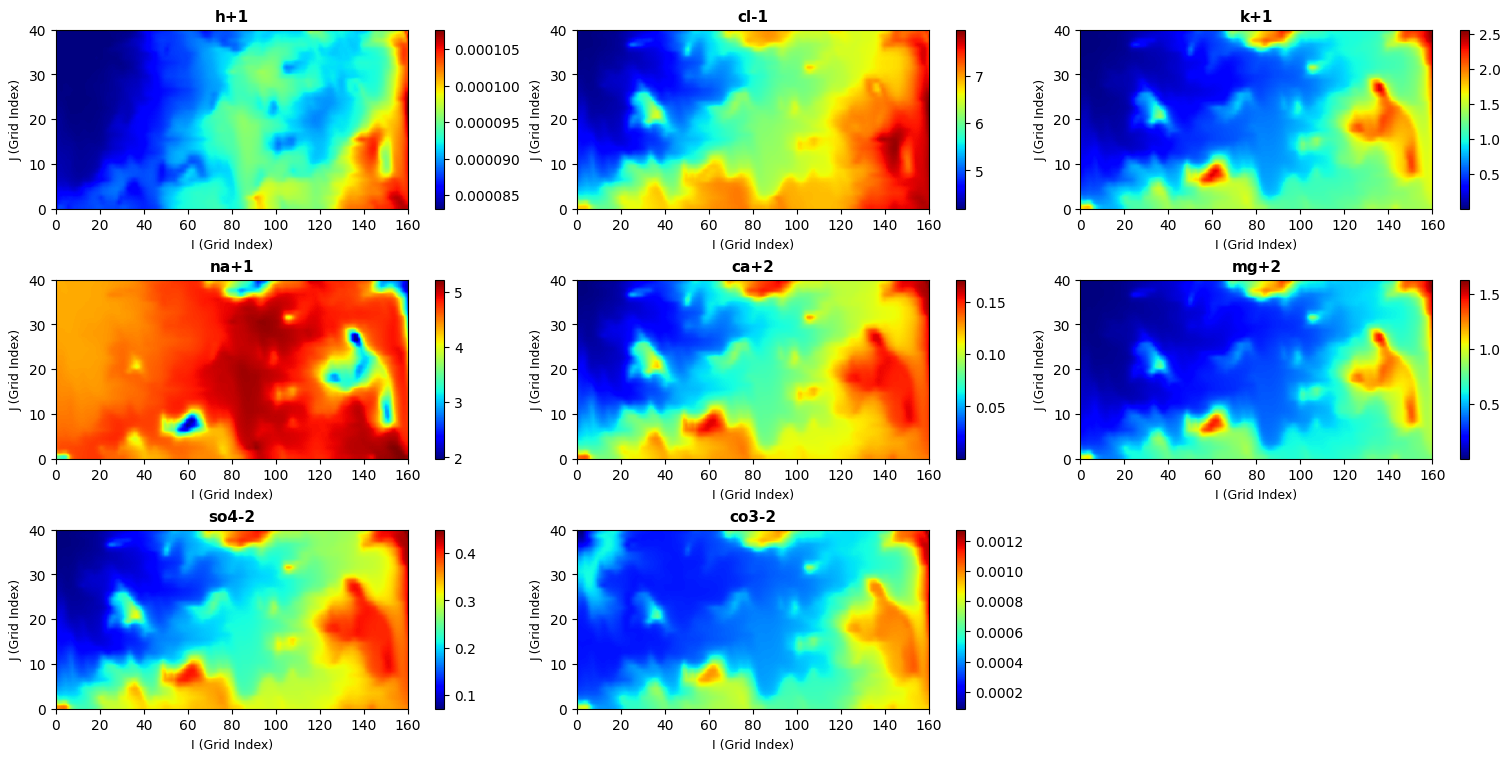

In [ ]:
filename = 'run_1.gst'
I = 160  
J = 40   

variables_map = {
    "h+1": 3,
    "cl-1": 4,
    "k+1": 5,
    "na+1": 6,
    "ca+2": 7,
    "mg+2": 8,
    "so4-2": 9,
    "co3-2": 10,
}

df = pd.read_csv(filename, skiprows=3, header=None, sep='\s+', engine='python')
data = df.values

plot_vars = list(variables_map.keys())
num_plots = len(plot_vars)
cols = 3
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 2.5 * rows), constrained_layout=True)
axes = axes.flatten()

for idx, var_name in enumerate(plot_vars):
    ax = axes[idx]
    col_idx = variables_map[var_name]
        
    col_data = data[:, col_idx]
    
    grid_data = col_data.reshape(J, I)
    
    im = ax.imshow(grid_data, origin='lower', cmap='jet', aspect='auto', 
                   extent=[0, I, 0, J])
    
    ax.set_title(var_name, fontsize=11, fontweight='bold')
    ax.set_xlabel('I (Grid Index)', fontsize=9)
    ax.set_ylabel('J (Grid Index)', fontsize=9)
    
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.show()